<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML311Coursera747-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# Machine Learning Foundation

## Course 5, Part c: Backpropagation DEMO


## Overview
In this exercise we will use backpropagation to train a multi-layer perceptron (with a single hidden layer).  We will experiment with different patterns and see how quickly or slowly the weights converge.  We will see the impact and interplay of different parameters such as learning rate, number of iterations, and number of data points.


In [1]:
import numpy as np
import matplotlib.pyplot as plt

In this exercise, we will prepare code to create a multi-layer perceptron with a single hidden layer (with 4 nodes) and train it via back-propagation.  We will take the following steps:

1. Initialize the weights to random values between -1 and 1
1. Perform the feed-forward computation
1. Compute the loss function
1. Calculate the gradients for all the weights via back-propagation
1. Update the weight matrices (using a learning_rate parameter)
1. Execute steps 2-5 for a fixed number of iterations
1. Plot the accuracies and log loss and observe how they change over time


Once the code is running, we can address the following questions:
- Which patterns was the neural network able to learn quickly and which took longer?
- What learning rates and numbers of iterations worked well?
- If you have time, try varying the size of the hidden layer and experiment with different activation functions (e.g. ReLu)


In [2]:
## This code below generates two x values and one y value according to different patterns.
## It also creates a "bias" term (a vector of 1s).
## The goal is then to learn the mapping from x to y using a neural network via back-propagation.

num_obs = 500
# Step 1: Initialize the weights to random values between -1 and 1
x_mat_1 = np.random.uniform(-1, 1, size=(num_obs, 2)) # shape: (500, 2)
x_mat_bias = np.ones((num_obs, 1)) # shape: (50|0, 1)
x_mat_full = np.concatenate((x_mat_1, x_mat_bias), axis=1) # shape: (500, 3)
# result >> [x, y, b]
x_mat_full[:5]

array([[ 0.96057929,  0.17481062,  1.        ],
       [-0.07565616, -0.08428062,  1.        ],
       [ 0.6319483 , -0.28902115,  1.        ],
       [-0.45488071,  0.77229752,  1.        ],
       [-0.65636112, -0.79567303,  1.        ]])

In [7]:
def choose_pattern(pattern='diamond'):
    """
    Choose pattern to train the neural network:
    1. Circle
    2. Diamond
    3. Centered Square
    4. Thick Right Angle
    5. Thin Right Angle
    """
    if pattern.lower() == 'circle':
        ## Euclidean distance (L2)
        ## Circular pattern >> √(x^2 + y^2) < r
        result = (np.sqrt(x_mat_full[:, 0]**2 + x_mat_full[:, 1]**2) < 0.75).astype(int)
    elif pattern.lower() == 'diamond':
        ## Manhattan distance (L1)
        ## Diamond pattern >> |x| + |y| < d
        result = ((np.abs(x_mat_full[:,0]) + np.abs(x_mat_full[:,1])) < 1).astype(int)
    elif pattern.lower() == 'centered square':
        ## Chebyshev distance (L∞ norm)
        ## Centered Square >> max(∣x∣, ∣y∣) < a
        result = ((np.maximum(np.abs(x_mat_full[:,0]), np.abs(x_mat_full[:,1]))) < 0.5).astype(int)
    elif pattern.lower() == 'thick right angle':
        ## Fat right-angle wedge (like an L-shape band) across the diagonal
        ## Thick Right Angle Pattern >> −0.5 < max(x, y) < 0.5
        result = (((np.maximum((x_mat_full[:,0]), (x_mat_full[:,1]))) < 0.5) &
                    ((np.maximum((x_mat_full[:,0]), (x_mat_full[:,1]))) > -0.5)).astype(int)
    elif pattern.lower() == 'thin right angle':
        ## Narrow right-angle strip above the origin
        ## Thin Right Angle Pattern >> 0 < max(x, y) < 0.5
        result = (((np.maximum((x_mat_full[:,0]), (x_mat_full[:,1]))) < 0.5) &
                    ((np.maximum((x_mat_full[:,0]), (x_mat_full[:,1]))) > 0)).astype(int)
    return result

shape of x_mat_full is (500, 3)
shape of y is (500,)


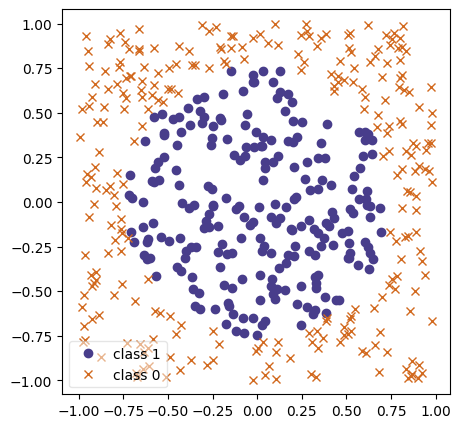

In [8]:
y = choose_pattern('circle') # result includes '1' and '0' only.
print('shape of x_mat_full is {}'.format(x_mat_full.shape))
print('shape of y is {}'.format(y.shape))

fig, ax = plt.subplots(figsize=(5, 5))
ax.plot(x_mat_full[y==1, 0], x_mat_full[y==1, 1], 'o', label='class 1', c='darkslateblue')
ax.plot(x_mat_full[y==0, 0], x_mat_full[y==0, 1], 'x', label='class 0', c='chocolate')
# ax.grid(True)
ax.legend(loc='best', framealpha=0.5)
ax.axis('equal')
plt.show()

Here are some helper functions


**Sigmoid function**  
$\displaystyle \sigma = \frac{1}{(1 + e^{-x})}$

---

**Logarithmic Loss (Log Loss) formula**  
$\displaystyle LogLoss=−\frac{1}{N}\sum_{i=1}^{N}{[y_i . log(\hat y_i) + (1-y_i) . log(1-\hat y_i)]}$

In [9]:
def sigmoid(x):
    """Sigmoid function:
    FORMULA: sigma = 1 / (1+e^(-x))
    """
    return 1.0 / (1.0 + np.exp(-x))

def loss_func(y_true, y_pred, eps=1e-16):
    """
    Loss function to optimize (minimize)
    Logarithmic loss will be used.
    Link: http://scikit-learn.org/stable/modules/model_evaluation.html#log-loss.
    """
    ## Compute the loss and accuracy
    ### Cut values btw max and min vals
    ypred = np.maximum(y_pred, eps) # compare both variables and take max vals
    ypred = np.minimum(ypred, (1 - eps)) # compare both variables and take min vals

    # Return LogLoss function
    return -(np.sum(y * np.log(ypred) +  \
            (1 - y) * np.log(1-ypred)))/ len(y) # LogLoss function

**Computation steps for Gradient values**  
- **Step 1**: Loss derivative w.r.t output = $\displaystyle \frac{\partial J}{\partial z_3} =(\hat y - y)$
- **Step 2**: Gradient w.r.t second-layer weights = $\displaystyle \frac{\partial J}{\partial W_2} =(\hat y - y).a_2$
- **Step 3**: Backpropagate to hidden layer = $\displaystyle \frac{\partial a_2}{\partial z_2} =\sigma(z_2)(1-\sigma(z_2))$
- **Step 4**: Gradient wrt first-layer weights = $\displaystyle \frac{\partial J}{\partial W_1} = \delta_2.x^T$
- **Step 5**: Final gradient = $\displaystyle \nabla J= (\frac{\partial J}{\partial W_1}, \frac{\partial J}{\partial W_2})$

In [10]:
def forward_pass(W1, W2):
    """
    Perform forward computation of the neural network
    Takes the input `x_mat` (global variable) and produces the output `y_pred`
    Also produces the gradient of the log loss function
    """
    # global x_mat, y, num_obs # no need to declare in this case

    # Step 2: Perform the feed-forward computation, and get the gradient
    # First, compute the new predictions 'y_pred'
    z_2 = np.dot(x_mat, W_1)
    a_2 = sigmoid(z_2)
    z_3 = np.dot(a_2, W_2)
    y_pred = sigmoid(z_3).reshape((len(x_mat),)) # shape: (500,)

    # Step 4: Calculate the gradients for all the weights via back-propagation
    ## Step 1: Loss derivative w.r.t output
    J_z_3_grad = y_pred - y
    ## Step 2: Gradient w.r.t second-layer weights
    J_W_2_grad = np.dot(J_z_3_grad, a_2)
    ## Step 3: Backpropagate to hidden layer
    a_2_z_2_grad = sigmoid(z_2)*(1-sigmoid(z_2))
    ## Step 4: Gradient wrt first-layer weights
    J_W_1_grad = (np.dot((J_z_3_grad).reshape(-1,1), W_2.reshape(-1,1).T) \
                  * a_2_z_2_grad).T.dot(x_mat).T

    ## Step 5: Final gradient
    gradient = (J_W_1_grad, J_W_2_grad)

    return y_pred, gradient

In [11]:
def plot_loss_accuracy(loss_vals, accuracies):
    fig = plt.figure(figsize=(16,8))
    fig.suptitle('Log loss and accuracy over iterations')

    ax = fig.add_subplot(1, 2, 1)
    ax.plot(loss_vals)
    ax.grid(True)
    ax.set(xlabel='Iterations', title='Log Loss')

    ax = fig.add_subplot(1, 2, 2)
    ax.plot(accuracies)
    ax.grid(True)
    ax.set(xlabel='Iterations', title='Accuracies')

In [12]:
# Initialize network parameters
np.random.seed(1241) # difference rdn seed no will be different results

# Two hidden layers
W_1 = np.random.uniform(-1, 1, size=(3, 4)) # between -1 and 1 | shape: (3, 4)
W_2 = np.random.uniform(-1, 1, size=(4)) # between -1 and 1 | shape: (4, )
num_iter = 5000 # number of loops
learning_rate = 1e-3 # eta = 0.001
x_mat = x_mat_full
loss_vals, accuracies = [], [] # two empty listed variables

**Accurace score**  
$\displaystyle Accuracy = \frac{1}{N} \sum_{i=1}^{N}{1 \text{ if }\hat y_i \geq 0.5 \Leftrightarrow y }$

Iteration 0, Log loss is 0.7678, accuracy is 0.54.
Iteration 200, Log loss is 0.6724, accuracy is 0.51.
Iteration 400, Log loss is 0.6476, accuracy is 0.61.
Iteration 600, Log loss is 0.5849, accuracy is 0.73.
Iteration 800, Log loss is 0.5137, accuracy is 0.75.
Iteration 1000, Log loss is 0.4691, accuracy is 0.78.
Iteration 1200, Log loss is 0.3875, accuracy is 0.86.
Iteration 1400, Log loss is 0.3061, accuracy is 0.90.
Iteration 1600, Log loss is 0.2611, accuracy is 0.92.
Iteration 1800, Log loss is 0.2346, accuracy is 0.93.
Iteration 2000, Log loss is 0.2168, accuracy is 0.93.
Iteration 2200, Log loss is 0.2040, accuracy is 0.93.
Iteration 2400, Log loss is 0.1939, accuracy is 0.93.
Iteration 2600, Log loss is 0.1855, accuracy is 0.93.
Iteration 2800, Log loss is 0.1781, accuracy is 0.94.
Iteration 3000, Log loss is 0.1715, accuracy is 0.94.
Iteration 3200, Log loss is 0.1655, accuracy is 0.94.
Iteration 3400, Log loss is 0.1600, accuracy is 0.94.
Iteration 3600, Log loss is 0.1549,

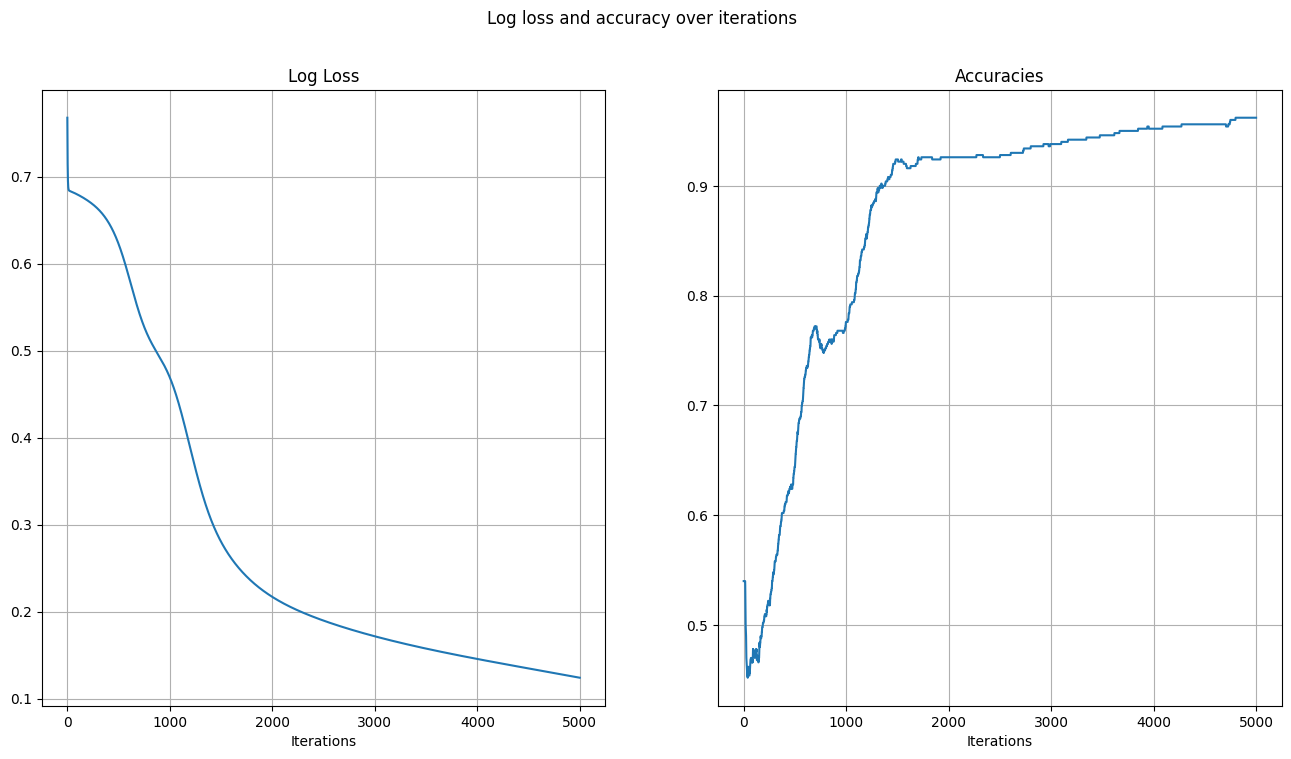

In [13]:
# Step 6: Execute steps 2-5 for a fixed number of iterations
for i in range(num_iter):
    # Step 2 & 4: Perform feed-forward computation, and get the gradient
    y_pred, (J_W_1_grad, J_W_2_grad) = forward_pass(W_1, W_2)

    # Step 3: Compute the log loss function and accuracy
    curr_loss = loss_func(y, y_pred)
    loss_vals.append(curr_loss)
    acc = np.sum((y_pred >= 0.5) == y) / num_obs

    # Step 5: Update the weight matrices (using a learning_rate parameter)
    W_1 = W_1 - learning_rate * J_W_1_grad
    W_2 = W_2 - learning_rate * J_W_2_grad


    # Explanation:-
    ## if y_pred ≥ 0.5, consider as 1
    ## compare the prediced val with true val and consider 1 if matched
    ## sume that ture values and divided by num_obs
    accuracies.append(acc)

    # Print the loss and accuracy for every 200th iteration
    if (i%200) == 0:
        print("Iteration {}, Log loss is {:.4f}, accuracy is {:.2f}." \
              .format(i, curr_loss, acc))

# Step 7: Plot the accuracies and log loss and observe how they change over time
plot_loss_accuracy(loss_vals, accuracies)

**Log Loss**  
- At the beginning, the log loss is high (__~0.85__), meaning the model predictions are far from the actual labels.
- As training progresses, the log loss decreases steadily, reaching < 0.1 by 10,000 iterations.
- This indicates that the model is learning well and improving prediction confidence.

---

**Accuracy**  
-Initially, accuracy is around 0.4 (__40%__), which is close to random guessing for binary classification.
- As training continues, accuracy increases rapidly, reaching about 0.8 (80%) by 1,000–2,000 iterations.
- Eventually, it stabilizes near 0.98 (98%), showing that the model has achieved very high classification performance.

Plot the predicted answers, with mistakes in yellow


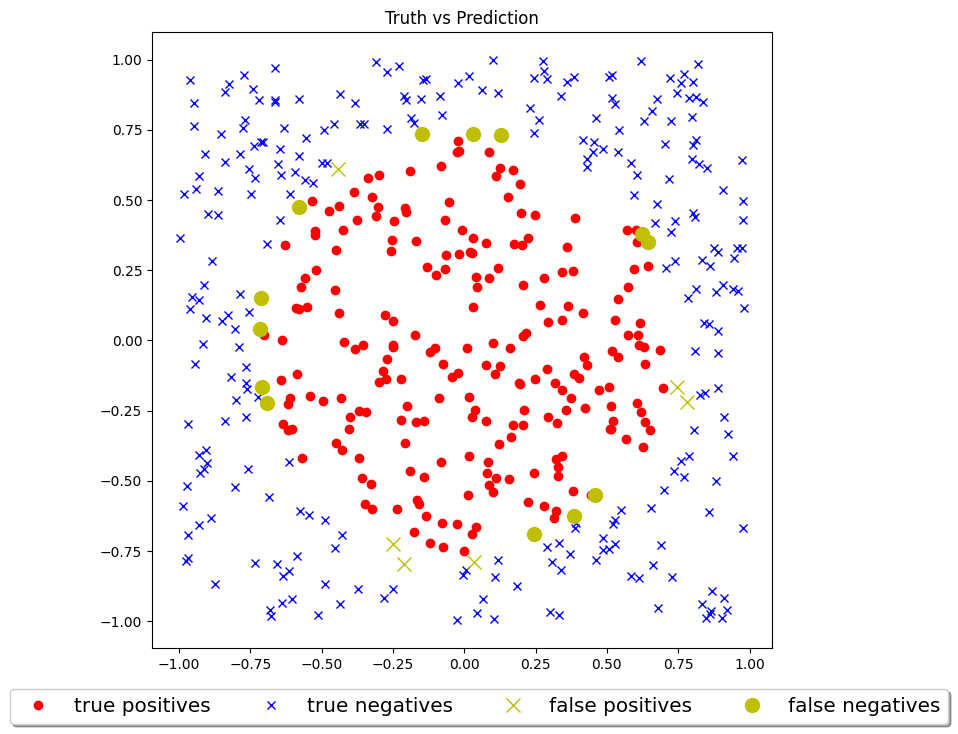

In [16]:
pred1 = (y_pred >= 0.5) # choose '1' vals for 'TRUE'
pred0 = (y_pred < 0.5)  # choose '0' vals for 'FALSE'

fig, ax = plt.subplots(figsize=(8,8))

# "True" predictions
ax.plot(x_mat[pred1 & (y==1), 0], x_mat[pred1 & (y==1), 1], 'ro', label='true positives') # target shape
ax.plot(x_mat[pred0 & (y==0), 0], x_mat[pred0 & (y==0), 1], 'bx', label='true negatives') # boundary shape

# "False" predictions
ax.plot(x_mat[pred1 & (y==0), 0], x_mat[pred1 & (y==0), 1], 'yx', ms=10, label='false positives') # target shape
ax.plot(x_mat[pred0 & (y==1), 0], x_mat[pred0 & (y==1), 1], 'yo', ms=10, label='false negatives') # boundary shape

ax.set(title="Truth vs Prediction")

plt.legend(bbox_to_anchor=(1.3, -0.05),
           ncol = 4,
           fancybox = True, # rounded corner
           shadow = True, # shaded by shadow
           fontsize = "x-large")
plt.show()

---
### Machine Learning Foundation (C) 2020 IBM Corporation
